In [1]:
## processing
import numpy as np

## visualization
import matplotlib.pyplot as plt

In [2]:
def generate_microtubule_lengths(shape, scale, total_length):
    # Initialize the lengths list and the current total length
    lengths = []
    current_total_length = 0
    # Keep generating lengths until the current total length is less than the desired total length
    while current_total_length < total_length:
        # Generate a new length
        new_length = round(np.random.gamma(shape, scale), 1)
        # If adding the new length doesn’t exceed the total length, add it to the lengths
        if new_length >= 1 and new_length <= 25:
            if current_total_length + new_length <= total_length:
                lengths.append(new_length)
                current_total_length += new_length
            else:
                # If adding the new length would exceed the total length, add a length that will make the current total length equal to the total length
                new_length = total_length - current_total_length
                if new_length >= 1:
                    lengths.append(new_length)
                    break
                else:
                    break
    return np.array(lengths)

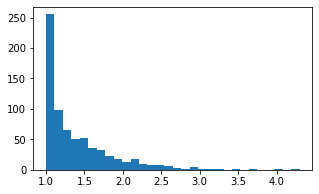

In [3]:
lMT = generate_microtubule_lengths(1, 0.5, 1000)

fig, ax = plt.subplots(figsize=(5,3))
ax.hist(lMT, bins=30)
plt.show()

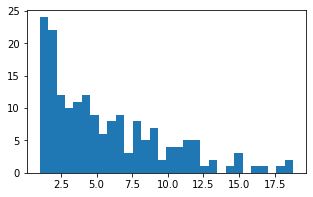

In [4]:
lMT = generate_microtubule_lengths(1, 5, 1000)

fig, ax = plt.subplots(figsize=(5,3))
ax.hist(lMT, bins=30)
plt.show()

In [5]:
d_lMT = {}
for i in np.arange(1, max(lMT)+0.1, 0.1):
    d_lMT[round(i,1)] = np.count_nonzero((lMT > i-1e-6) & (lMT < i+1e-6))

In [6]:
file = open('template.cym', 'r')
lines = file.readlines()

In [7]:
scale_list = np.arange(0.25, 5.1, 0.25)

for ii in range(10):
    i = 0
    for scale in scale_list:
        num_zeros = 4 - len(str(i))
        filename = 'config{}.cym'.format(num_zeros * '0' + str(i))
        with open('./gamma-1d/series{}/'.format(ii) + filename, 'w') as f:
            f.write('%shape = 1, scale = {}\n'.format(round(scale, 2)))
            for line in lines[:28]:
                f.write(line)
            
            lMT = generate_microtubule_lengths(1, scale, 1000)
            d_lMT = {}
            for l in np.arange(1, max(lMT)+0.1, 0.1):
                d_lMT[round(l,1)] = np.count_nonzero((lMT > l-1e-6) & (lMT < l+1e-6))
                
            for length,count in d_lMT.items():
                    f.write('new {} microtubule'.format(count))
                    f.write("\n{\n")
                    f.write("\tlength = {}".format(length))
                    f.write("\n}\n\n")

            for line in lines[28:]:
                f.write(line)
        i += 1

## 2d phase diagram

In [3]:
file = open('template.cym', 'r')
lines = file.readlines()

In [4]:
shape_list = np.arange(0.5, 7.1, 0.5)
scale_list = np.arange(0.5, 7.1, 0.5)

In [6]:
i = 0
for shape in shape_list:
    for scale in scale_list:
        num_zeros = 4 - len(str(i))
        filename = 'config{}.cym'.format(num_zeros * '0' + str(i))
        
        with open('./2d-phase/' + filename, 'w') as f:
            f.write('%shape = {}, scale = {}\n'.format(round(shape, 1), round(scale, 1)))
            for line in lines[:28]:
                f.write(line)
            
            lMT = generate_microtubule_lengths(shape, scale, 1000)
            d_lMT = {}
            for l in np.arange(1, max(lMT)+0.1, 0.1):
                d_lMT[round(l,1)] = np.count_nonzero((lMT > l-1e-6) & (lMT < l+1e-6))
                
            for length,count in d_lMT.items():
                    f.write('new {} microtubule'.format(count))
                    f.write("\n{\n")
                    f.write("\tlength = {}".format(length))
                    f.write("\n}\n\n")

            for line in lines[28:]:
                f.write(line)
        i += 1